# HW1: Shallow Neural Network

## Part 1: Shallow Neural Network 

Chloe Quinto     
CS 583 Deep Learning        

In [1]:
import warnings 
warnings.filterwarnings('ignore') # feel free to comment this out 

import h5py
import numpy as np
import matplotlib.pyplot as plt 

import sklearn 
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.utils import to_categorical
from keras import layers
from keras import models 
from keras.layers import Dense
from keras import optimizers 
from keras.callbacks import ModelCheckpoint, EarlyStopping

import tensorflow as tf


Using TensorFlow backend.


# 1. Preprocessing 

### 1.1 Load Dataset 

In [2]:
wine = sklearn.datasets.load_wine()

print("Wine Features:", wine.feature_names)
print('\n')
print("Wine Data:", wine.data)
print('\n')
print("Wine Target:", wine.target)

Wine Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Wine Data: [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


Wine Target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

### 1.2 Build Dataframe 

In [3]:
df = pd.DataFrame(wine.data)
df.columns = wine.feature_names
df["class"] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### 1.3 Check for Null Values 

In [4]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

### 1.4 Partition data into training and testing set

In [5]:
labels = df.loc[:,["class"]] 
features = df.drop(["class"],axis=1)
print(labels.shape)
print(features.shape)

(178, 1)
(178, 13)


In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels)

### 1.5 Convert class vectors (0,1,2) into binary class matrices 

In [7]:
ytrain = to_categorical(ytrain, 3)
ytest = to_categorical(ytest,3)

In [8]:
print("xtrain", xtrain.shape)
print("xtest", xtest.shape)
print("ytrain", ytrain.shape)
print("ytest", ytest.shape)

xtrain (133, 13)
xtest (45, 13)
ytrain (133, 3)
ytest (45, 3)


### 1.6 Scale data between 0 and 1 

In [9]:
scale = MinMaxScaler(feature_range=(0,1))
xtrain = scale.fit_transform(xtrain)
xtest = scale.fit_transform(xtest)

### 1.7  Randomly partition the training set to training and validation sets 

Randomly partition the 133 training samples into two sets 
* a training set containing  100 samples 
* a validation set containing 33 samples 

In [10]:
rand_idx = np.random.permutation(133)
train_idx = rand_idx[0:100]
valid_idx = rand_idx[100:133]

xval = xtrain[valid_idx,:]
yval = ytrain[valid_idx,:]

xtr = xtrain[train_idx, :]
ytr = ytrain[train_idx,:]

print("Shape of xtrain: ", xtr.shape)
print("Shape of ytrain: ", ytr.shape)
print("Shape of xval: ", xval.shape)
print("Shape of yval: ", yval.shape)

Shape of xtrain:  (100, 13)
Shape of ytrain:  (100, 3)
Shape of xval:  (33, 13)
Shape of yval:  (33, 3)


# 2. Build NN and tune its hyper-parameters

In [11]:
model = Sequential()
model.add(Dense(10, input_dim=13,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


###  2.1 Initial Weights and Biases 

In [12]:
print("Weights", model.layers[0].get_weights()[0])
print("\n")
print("Bias", model.layers[0].get_weights()[1])

Weights [[ 0.11852539 -0.00571406  0.3965689   0.21993208 -0.24320123 -0.43545473
   0.15594971 -0.35494775 -0.00058186  0.17456704]
 [-0.4789152   0.07745689  0.42483026 -0.33472976 -0.09302208  0.0011375
  -0.25262892  0.4987132  -0.18667385  0.20937967]
 [-0.1941399  -0.18324265 -0.49381137 -0.31768566  0.08393973  0.38353437
   0.257697    0.3005675  -0.2926576   0.3240729 ]
 [ 0.04192114  0.48680955 -0.2723698  -0.14979082  0.12773353 -0.33002174
  -0.03976297 -0.20817095  0.06972599 -0.1531016 ]
 [-0.02027744  0.34265304 -0.32866937  0.18772095 -0.1735338  -0.10284054
   0.29102802 -0.23543635 -0.33220163  0.49683338]
 [-0.47357792  0.09673297  0.07951331  0.41908377  0.4497699   0.11660212
  -0.45257384  0.40465903 -0.09361985 -0.42104724]
 [-0.09606519 -0.00058901  0.50596076 -0.03082508 -0.39805135 -0.1496616
   0.08702266 -0.02699372  0.48292607  0.43344754]
 [-0.22551611 -0.11662635 -0.01021373 -0.485886   -0.4510612  -0.1578477
   0.0663771   0.19671136  0.12541008  0.22365

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 15        
Total params: 367
Trainable params: 367
Non-trainable params: 0
________________________________________________________

In [14]:
model.compile(loss="categorical_crossentropy", optimizer = optimizers.RMSprop(lr = 1e-3), metrics = ["acc"])

### 2.2 Save the weights of our model

In [15]:
checkpoint = ModelCheckpoint("model_part1.hdf5", monitor="loss", verbose=1, save_best_only = True, mode="auto", period=1)

### 2.3 Apply early stopping to prevent overfitting

In [16]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',restore_best_weights=True)

### 2.4 Train the model 

In [17]:
history = model.fit(xtr, ytr, batch_size=50, epochs=2000, verbose =1, validation_data=(xval,yval), callbacks=[checkpoint,monitor])

Instructions for updating:
Use tf.cast instead.
Train on 100 samples, validate on 33 samples
Epoch 1/2000
100/100 [==============================] - 0s 2ms/step - loss: 1.0795 - acc: 0.3100 - val_loss: 1.0709 - val_acc: 0.4545

Epoch 00001: loss improved from inf to 1.07949, saving model to model_part1.hdf5
Epoch 2/2000
100/100 [==============================] - 0s 50us/step - loss: 1.0703 - acc: 0.3600 - val_loss: 1.0636 - val_acc: 0.4848

Epoch 00002: loss improved from 1.07949 to 1.07027, saving model to model_part1.hdf5
Epoch 3/2000
100/100 [==============================] - 0s 49us/step - loss: 1.0634 - acc: 0.3600 - val_loss: 1.0573 - val_acc: 0.4848

Epoch 00003: loss improved from 1.07027 to 1.06338, saving model to model_part1.hdf5
Epoch 4/2000
100/100 [==============================] - 0s 49us/step - loss: 1.0594 - acc: 0.3900 - val_loss: 1.0528 - val_acc: 0.4848

Epoch 00004: loss improved from 1.06338 to 1.05937, saving model to model_part1.hdf5
Epoch 5/2000
100/100 [======


Epoch 00036: loss improved from 0.89648 to 0.89146, saving model to model_part1.hdf5
Epoch 37/2000
100/100 [==============================] - 0s 82us/step - loss: 0.8868 - acc: 0.5200 - val_loss: 0.8609 - val_acc: 0.5455

Epoch 00037: loss improved from 0.89146 to 0.88684, saving model to model_part1.hdf5
Epoch 38/2000
100/100 [==============================] - 0s 47us/step - loss: 0.8824 - acc: 0.5200 - val_loss: 0.8560 - val_acc: 0.5455

Epoch 00038: loss improved from 0.88684 to 0.88236, saving model to model_part1.hdf5
Epoch 39/2000
100/100 [==============================] - 0s 69us/step - loss: 0.8787 - acc: 0.5000 - val_loss: 0.8523 - val_acc: 0.5455

Epoch 00039: loss improved from 0.88236 to 0.87866, saving model to model_part1.hdf5
Epoch 40/2000
100/100 [==============================] - 0s 53us/step - loss: 0.8745 - acc: 0.5300 - val_loss: 0.8473 - val_acc: 0.5455

Epoch 00040: loss improved from 0.87866 to 0.87445, saving model to model_part1.hdf5
Epoch 41/2000
100/100 [===


Epoch 00073: loss improved from 0.76614 to 0.76419, saving model to model_part1.hdf5
Epoch 74/2000
100/100 [==============================] - 0s 124us/step - loss: 0.7603 - acc: 0.8200 - val_loss: 0.7380 - val_acc: 0.9394

Epoch 00074: loss improved from 0.76419 to 0.76034, saving model to model_part1.hdf5
Epoch 75/2000
100/100 [==============================] - 0s 85us/step - loss: 0.7574 - acc: 0.8200 - val_loss: 0.7345 - val_acc: 0.9394

Epoch 00075: loss improved from 0.76034 to 0.75738, saving model to model_part1.hdf5
Epoch 76/2000
100/100 [==============================] - 0s 68us/step - loss: 0.7553 - acc: 0.8100 - val_loss: 0.7323 - val_acc: 0.9394

Epoch 00076: loss improved from 0.75738 to 0.75533, saving model to model_part1.hdf5
Epoch 77/2000
100/100 [==============================] - 0s 60us/step - loss: 0.7513 - acc: 0.8200 - val_loss: 0.7299 - val_acc: 0.9394

Epoch 00077: loss improved from 0.75533 to 0.75132, saving model to model_part1.hdf5
Epoch 78/2000
100/100 [==

100/100 [==============================] - 0s 61us/step - loss: 0.6458 - acc: 0.8800 - val_loss: 0.6049 - val_acc: 0.9697

Epoch 00110: loss improved from 0.64914 to 0.64582, saving model to model_part1.hdf5
Epoch 111/2000
100/100 [==============================] - 0s 48us/step - loss: 0.6411 - acc: 0.8800 - val_loss: 0.5975 - val_acc: 0.9697

Epoch 00111: loss improved from 0.64582 to 0.64112, saving model to model_part1.hdf5
Epoch 112/2000
100/100 [==============================] - 0s 61us/step - loss: 0.6378 - acc: 0.8800 - val_loss: 0.5952 - val_acc: 1.0000

Epoch 00112: loss improved from 0.64112 to 0.63779, saving model to model_part1.hdf5
Epoch 113/2000
100/100 [==============================] - 0s 46us/step - loss: 0.6345 - acc: 0.8800 - val_loss: 0.5859 - val_acc: 0.9697

Epoch 00113: loss improved from 0.63779 to 0.63447, saving model to model_part1.hdf5
Epoch 114/2000
100/100 [==============================] - 0s 49us/step - loss: 0.6294 - acc: 0.8800 - val_loss: 0.5832 - va

Epoch 147/2000
100/100 [==============================] - 0s 63us/step - loss: 0.4940 - acc: 0.9100 - val_loss: 0.4360 - val_acc: 1.0000

Epoch 00147: loss improved from 0.49500 to 0.49397, saving model to model_part1.hdf5
Epoch 148/2000
100/100 [==============================] - 0s 100us/step - loss: 0.4889 - acc: 0.9200 - val_loss: 0.4262 - val_acc: 0.9697

Epoch 00148: loss improved from 0.49397 to 0.48889, saving model to model_part1.hdf5
Epoch 149/2000
100/100 [==============================] - 0s 76us/step - loss: 0.4846 - acc: 0.9200 - val_loss: 0.4216 - val_acc: 0.9697

Epoch 00149: loss improved from 0.48889 to 0.48457, saving model to model_part1.hdf5
Epoch 150/2000
100/100 [==============================] - 0s 55us/step - loss: 0.4798 - acc: 0.9200 - val_loss: 0.4180 - val_acc: 1.0000

Epoch 00150: loss improved from 0.48457 to 0.47977, saving model to model_part1.hdf5
Epoch 151/2000
100/100 [==============================] - 0s 61us/step - loss: 0.4780 - acc: 0.9300 - val_l

100/100 [==============================] - 0s 63us/step - loss: 0.3461 - acc: 0.9400 - val_loss: 0.3057 - val_acc: 0.9697

Epoch 00184: loss improved from 0.35250 to 0.34609, saving model to model_part1.hdf5
Epoch 185/2000
100/100 [==============================] - 0s 79us/step - loss: 0.3435 - acc: 0.9300 - val_loss: 0.3048 - val_acc: 0.9697

Epoch 00185: loss improved from 0.34609 to 0.34345, saving model to model_part1.hdf5
Epoch 186/2000
100/100 [==============================] - 0s 50us/step - loss: 0.3413 - acc: 0.9500 - val_loss: 0.3001 - val_acc: 0.9697

Epoch 00186: loss improved from 0.34345 to 0.34131, saving model to model_part1.hdf5
Epoch 187/2000
100/100 [==============================] - 0s 70us/step - loss: 0.3346 - acc: 0.9300 - val_loss: 0.2988 - val_acc: 0.9394

Epoch 00187: loss improved from 0.34131 to 0.33461, saving model to model_part1.hdf5
Epoch 188/2000
100/100 [==============================] - 0s 77us/step - loss: 0.3314 - acc: 0.9300 - val_loss: 0.2954 - va


Epoch 00221: loss did not improve from 0.23347
Epoch 222/2000
100/100 [==============================] - 0s 57us/step - loss: 0.2292 - acc: 0.9800 - val_loss: 0.2211 - val_acc: 0.9394

Epoch 00222: loss improved from 0.23347 to 0.22919, saving model to model_part1.hdf5
Epoch 223/2000
100/100 [==============================] - 0s 100us/step - loss: 0.2244 - acc: 0.9800 - val_loss: 0.2190 - val_acc: 0.9394

Epoch 00223: loss improved from 0.22919 to 0.22440, saving model to model_part1.hdf5
Epoch 224/2000
100/100 [==============================] - 0s 80us/step - loss: 0.2249 - acc: 0.9500 - val_loss: 0.2182 - val_acc: 0.9394

Epoch 00224: loss did not improve from 0.22440
Epoch 225/2000
100/100 [==============================] - 0s 74us/step - loss: 0.2193 - acc: 0.9800 - val_loss: 0.2151 - val_acc: 0.9394

Epoch 00225: loss improved from 0.22440 to 0.21928, saving model to model_part1.hdf5
Epoch 226/2000
100/100 [==============================] - 0s 81us/step - loss: 0.2186 - acc: 0.97

100/100 [==============================] - 0s 64us/step - loss: 0.1333 - acc: 1.0000 - val_loss: 0.1569 - val_acc: 0.9394

Epoch 00259: loss improved from 0.13610 to 0.13330, saving model to model_part1.hdf5
Epoch 260/2000
100/100 [==============================] - 0s 67us/step - loss: 0.1311 - acc: 0.9900 - val_loss: 0.1553 - val_acc: 0.9394

Epoch 00260: loss improved from 0.13330 to 0.13113, saving model to model_part1.hdf5
Epoch 261/2000
100/100 [==============================] - 0s 96us/step - loss: 0.1312 - acc: 1.0000 - val_loss: 0.1544 - val_acc: 0.9394

Epoch 00261: loss did not improve from 0.13113
Epoch 262/2000
100/100 [==============================] - 0s 108us/step - loss: 0.1324 - acc: 0.9900 - val_loss: 0.1531 - val_acc: 0.9394

Epoch 00262: loss did not improve from 0.13113
Epoch 263/2000
100/100 [==============================] - 0s 74us/step - loss: 0.1268 - acc: 0.9900 - val_loss: 0.1522 - val_acc: 0.9394

Epoch 00263: loss improved from 0.13113 to 0.12677, saving m


Epoch 00297: loss improved from 0.07323 to 0.07294, saving model to model_part1.hdf5
Epoch 298/2000
100/100 [==============================] - 0s 48us/step - loss: 0.0685 - acc: 1.0000 - val_loss: 0.1184 - val_acc: 0.9394

Epoch 00298: loss improved from 0.07294 to 0.06847, saving model to model_part1.hdf5
Epoch 299/2000
100/100 [==============================] - 0s 49us/step - loss: 0.0668 - acc: 1.0000 - val_loss: 0.1178 - val_acc: 0.9394

Epoch 00299: loss improved from 0.06847 to 0.06682, saving model to model_part1.hdf5
Epoch 300/2000
100/100 [==============================] - 0s 59us/step - loss: 0.0656 - acc: 1.0000 - val_loss: 0.1173 - val_acc: 0.9394

Epoch 00300: loss improved from 0.06682 to 0.06562, saving model to model_part1.hdf5
Epoch 301/2000
100/100 [==============================] - 0s 104us/step - loss: 0.0639 - acc: 1.0000 - val_loss: 0.1170 - val_acc: 0.9394

Epoch 00301: loss improved from 0.06562 to 0.06386, saving model to model_part1.hdf5
Epoch 302/2000
100/10

Epoch 336/2000
100/100 [==============================] - 0s 51us/step - loss: 0.0324 - acc: 1.0000 - val_loss: 0.0994 - val_acc: 0.9394

Epoch 00336: loss improved from 0.03405 to 0.03243, saving model to model_part1.hdf5
Epoch 337/2000
100/100 [==============================] - 0s 82us/step - loss: 0.0334 - acc: 1.0000 - val_loss: 0.1018 - val_acc: 0.9394

Epoch 00337: loss did not improve from 0.03243
Restoring model weights from the end of the best epoch
Epoch 00337: early stopping


# 3. Analysis

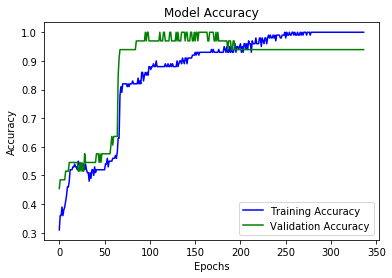

In [18]:
train_acc = history.history["acc"]
valid_acc = history.history["val_acc"]
epochs = range(len(history.history["loss"]))

plt.plot(epochs, train_acc, "b", label="Training Accuracy")
plt.plot(epochs, valid_acc, "g", label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

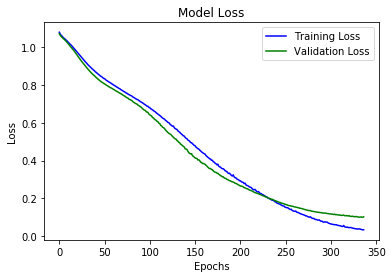

In [19]:
plt.plot(epochs, history.history["loss"], "b", label="Training Loss")
plt.plot(epochs, history.history["val_loss"], "g", label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

Discusion:    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Without early stopping, overfitting occurs on the model. In other words, the neural network is trained to the point that it begins to memorize rather than generalize. Without applying EarlyStopping()we would've seen overfitting on our validation 

### 3.1 Most Optimal Weights and Biases within each layer 

In [20]:
from keras.models import load_model
model = load_model('model_part1.hdf5')
for num, layer in enumerate(model.layers):
    if len(layer.weights) > 0:
        print(layer.name)
        print("weights", model.layers[num].get_weights()[0], "\n")
        print("bias", model.layers[num].get_weights()[1], "\n")
        print("=====================================================")

dense_1
weights [[ 0.11852539  0.03579555  0.53498936 -0.02152601 -0.16309673 -0.43545473
   0.14262624 -0.18763398 -0.3851467   0.27229002]
 [-0.4789152   0.3445112   0.24925473 -0.54025584 -0.09228903  0.0011375
  -0.2602914   0.33232757 -0.27523527  0.01975149]
 [-0.1941399  -0.12324398 -0.42013952 -0.43033704  0.19288717  0.38353437
   0.24116543  0.43745983 -0.48473975  0.40872246]
 [ 0.04192114  0.7559732  -0.56736416  0.07506604  0.13190727 -0.33002174
  -0.05821126 -0.33800483  0.11417545 -0.299113  ]
 [-0.02027744  0.52094555 -0.34019828  0.11099537 -0.20498377 -0.10284054
   0.2719161  -0.20378593 -0.34189063  0.4400291 ]
 [-0.47357792  0.12839217  0.14928336  0.6056564   0.5429525   0.11660212
  -0.47118556  0.49423787  0.05798253 -0.32762375]
 [-0.09606519 -0.27639124  0.76346666  0.32321116  0.1138175  -0.1496616
   0.06731061  0.33991295  0.5784123   0.7997491 ]
 [-0.22551611 -0.0062688  -0.19131346 -0.23229147 -0.43992445 -0.1578477
   0.05231163  0.21007958 -0.04679294 

# 4. Testing Model 

In [21]:
evalModel = Sequential()
evalModel.add(Dense(10, input_dim=13,activation='relu'))
evalModel.add(Dense(8, activation='relu'))
evalModel.add(Dense(6, activation='relu'))
evalModel.add(Dense(6, activation='relu'))
evalModel.add(Dense(4, activation='relu'))
evalModel.add(Dense(3, activation='softmax'))

evalModel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 15        
Total params: 367
Trainable params: 367
Non-trainable params: 0
________________________________________________________

### 4.1 We will use the tuned weights we got during training for testing 

In [22]:
evalModel.load_weights('model_part1.hdf5')
evalModel.compile(loss="categorical_crossentropy", optimizer = optimizers.RMSprop(lr = 1e-3), metrics = ["acc"])

In [23]:
lossAndAcc = evalModel.evaluate(xtest, ytest)
print("Loss=", lossAndAcc[0])
print("Accuracy=", lossAndAcc[1])

45/45 [==============================] - 0s 795us/step
Loss= 0.07195424801773495
Accuracy= 0.9777777791023254
